In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pwd

'C:\\Users\\USER\\Documents\\Received\\PYTHON\\Xin_Yin\\WriteUp-Result_3-Research'

In [3]:
df=pd.read_csv("C:\\Users\\USER\\Documents\\Received\\PYTHON\\Xin_Yin\\WriteUp-Result_3-Research\\Yin_DatabaseFor_Rocks.csv")

In [4]:
df

,SRn,Vp,Is,UCS
0,69.0,5390,11.02,158.16
1,64.0,5440,8.08,125.28
2,68.0,5740,8.44,129.04
3,67.0,6310,9.20,142.40
4,65.0,4740,7.25,109.17
...,...,...,...,...
724,23.0,2633,2.28,17.26
725,24.0,2886,2.36,19.90
726,32.0,3045,2.64,32.44
727,35.0,3099,2.77,36.95


In [5]:
#Check the shape of the data at this point
df.shape

(729, 4)

In [6]:
#information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SRn     729 non-null    float64
 1   Vp      729 non-null    int64  
 2   Is      729 non-null    float64
 3   UCS     729 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 22.9 KB


In [7]:
#statistics about the data
df.describe()

,SRn,Vp,Is,UCS
count,729.000000,729.000000,729.000000,729.000000
mean,41.645432,4679.635117,4.338053,75.305366
std,11.877275,1387.795732,3.024891,44.779250
min,10.000000,375.000000,0.530000,2.030000
25%,33.000000,3722.000000,2.450000,42.790000
50%,41.000000,4922.000000,3.390000,63.680000
75%,50.000000,5685.000000,5.230000,102.500000
max,72.000000,7943.000000,23.100000,239.000000


In [8]:
#check for null values
df.isnull().sum()

SRn    0
Vp     0
Is     0
UCS    0
dtype: int64

In [9]:
#check the presence of duplicate values
df.duplicated().sum()

0

In [10]:
#what is the current shape of the dataset
df.shape


(729, 4)

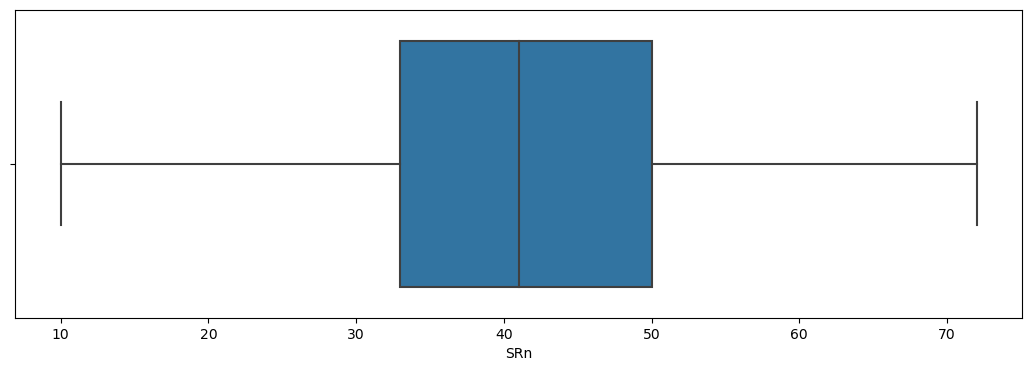

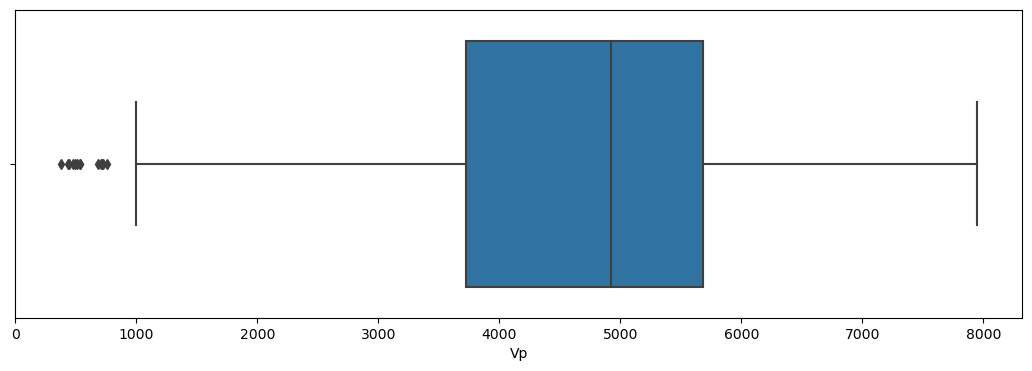

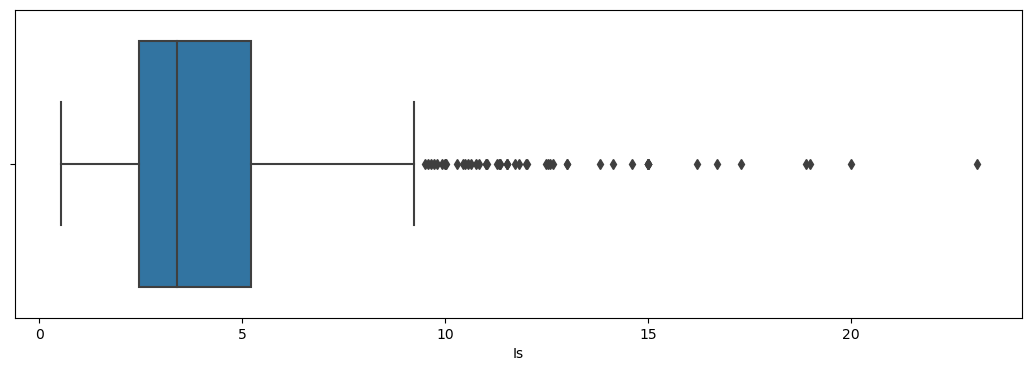

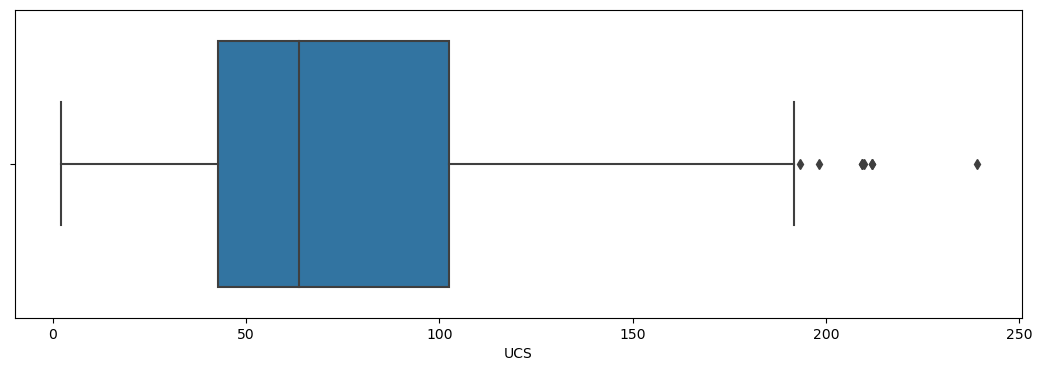

In [11]:
#EDA commences here
for column in df.columns:
    plt.figure(figsize=(13,4))
    sns.boxplot(x=column,data=df);

In [12]:
#what is the existing correlation among the independent variables
df.corr()

,SRn,Vp,Is,UCS
SRn,1.000000,0.430908,0.511204,0.685848
Vp,0.430908,1.000000,0.223489,0.637990
Is,0.511204,0.223489,1.000000,0.415398
UCS,0.685848,0.637990,0.415398,1.000000


<Axes: >

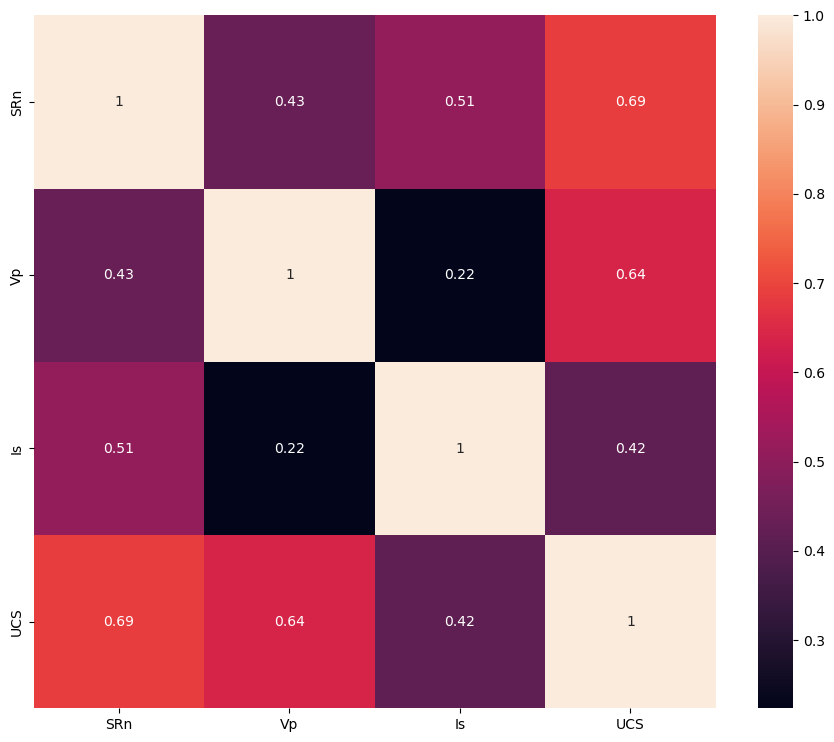

In [13]:
#produce a heatmap of the above result
plt.figure(figsize=(11,9))
sns.heatmap(data=df.corr(),annot=True)

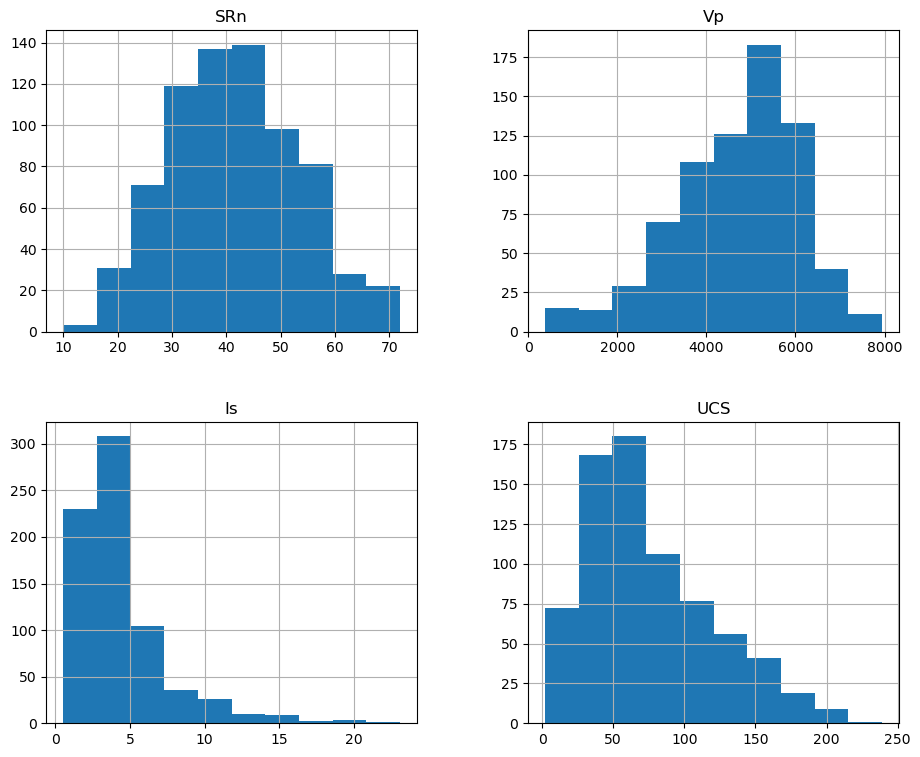

In [14]:
#conduct a univariate analysis

#make a histogram
df.hist(figsize=(11, 9));

In [15]:
#attempt to make data normally distributed, split data first in train-val-test

X=df.drop(['UCS'],axis=1) #X is "remove the variable in '' "
y=df['UCS']

In [16]:

Trainingset_XinYin=pd.read_csv("C:\\Users\\USER\\Documents\\Received\\PYTHON\\Xin_Yin\\WriteUp-Result_3-Research\\Book10-RF-Train-90-10.csv")
Testset_XinYin=pd.read_csv("C:\\Users\\USER\\Documents\\Received\\PYTHON\\Xin_Yin\\WriteUp-Result_3-Research\\Book10-RF-Test-90-10.csv")


In [17]:
Trainingset_XinYin

,SRn,Vp,Is,UCS
0,36.00,6080,1.37,59.73
1,26.90,758,1.03,6.50
2,21.00,2370,1.10,18.00
3,46.00,4480,1.33,71.50
4,32.00,5051,2.86,59.53
...,...,...,...,...
651,49.00,5988,4.92,168.70
652,55.00,5400,5.61,51.30
653,62.00,6750,8.60,239.00
654,52.55,6074,4.49,49.22


In [18]:
Testset_XinYin

,SRn,Vp,Is,UCS
0,49.00,2583,4.34,38.30
1,47.10,3612,5.38,50.30
2,26.00,727,0.97,4.90
3,19.90,436,0.78,2.99
4,52.70,4545,5.17,57.40
...,...,...,...,...
68,17.00,3791,1.68,25.33
69,49.00,4530,2.43,80.50
70,48.30,4650,5.61,62.30
71,26.00,3120,1.20,37.00


In [19]:

X_model_train=Trainingset_XinYin.drop(['UCS'],axis=1) #X is "remove the variable in '' "
y_model_train=Trainingset_XinYin['UCS']
X_test=Testset_XinYin.drop(['UCS'],axis=1) #X is "remove the variable in '' "
y_test=Testset_XinYin['UCS']

In [20]:
print('x train data {}'.format(X_model_train.shape))
print('y train data {}'.format(y_model_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))




x train data (656, 3)
y train data (656,)
x test data  (73, 3)
y test data  (73,)


In [21]:
X_model_train.skew()

SRn    0.198226
Vp    -0.384381
Is     2.219237
dtype: float64

In [22]:
X_test.skew()

SRn    0.508018
Vp    -0.627608
Is     1.356120
dtype: float64

In [23]:
#ChuksData_df = pd.DataFrame({'X_model_train': [X_model_train], 'y_model_train' : [y_model_train], 'X_test' : [X_test], 'y_test' : [y_test]})
#pd.DataFrame(X_model_train, y_model_train).to_csv('training.csv')
training_data_x = X_model_train
test_data_x = X_test
training_data_y = y_model_train
test_data_y = y_test
training_data_x.to_csv('yin_training_data_x.csv', index=False)
test_data_x.to_csv('yin_test_data_x.csv', index=False)
training_data_y.to_csv('yin_training_data_y.csv', index=False)
test_data_y.to_csv('yin_test_data_y.csv', index=False)

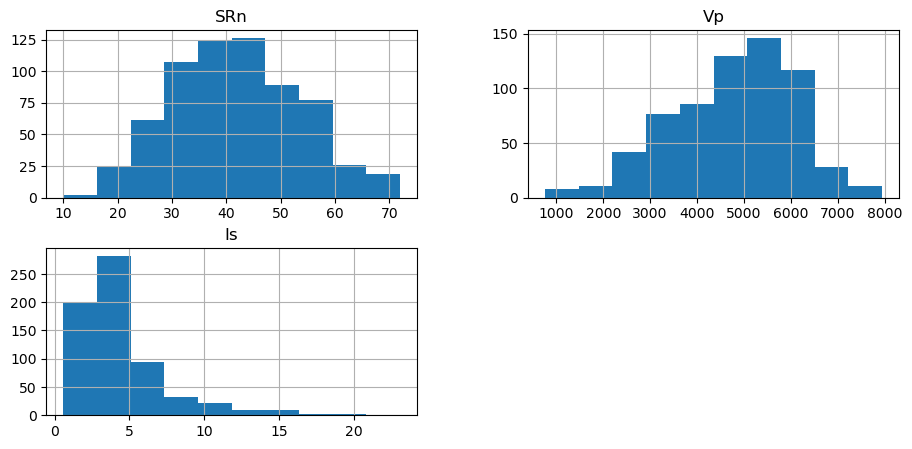

In [24]:
X_model_train.hist(figsize=(11,5));

In [25]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
X_model_train_transformed_arr=pt.fit_transform(X_model_train)
X_test_transformed_arr=pt.fit_transform(X_test)

In [26]:
X_model_train_transformed=pd.DataFrame(X_model_train_transformed_arr,columns=X_model_train.columns)
X_test_transformed=pd.DataFrame(X_test_transformed_arr, columns=['SRn', 'Vp', 'Is'])
from scipy import stats

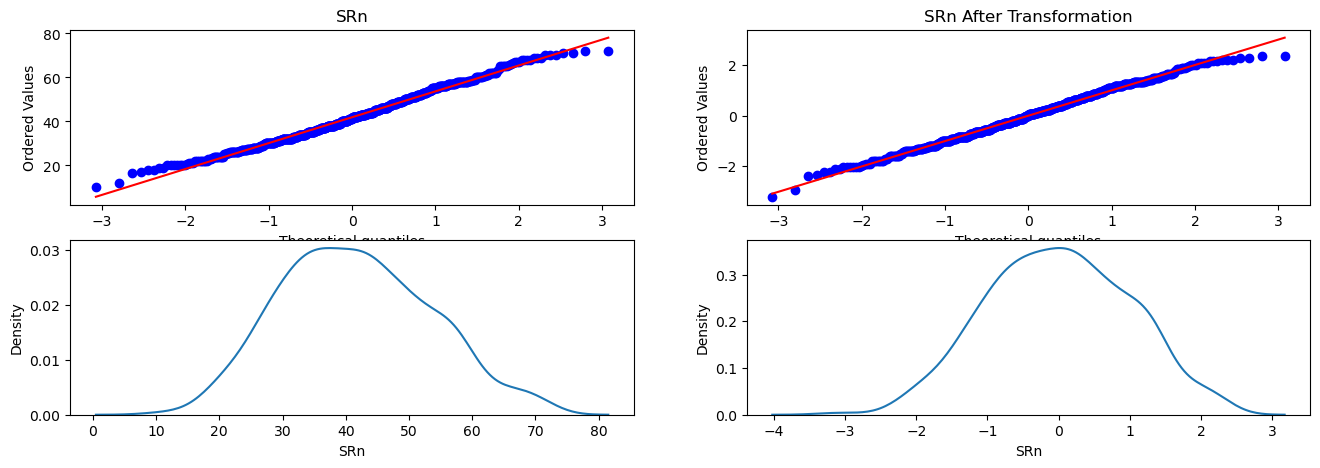

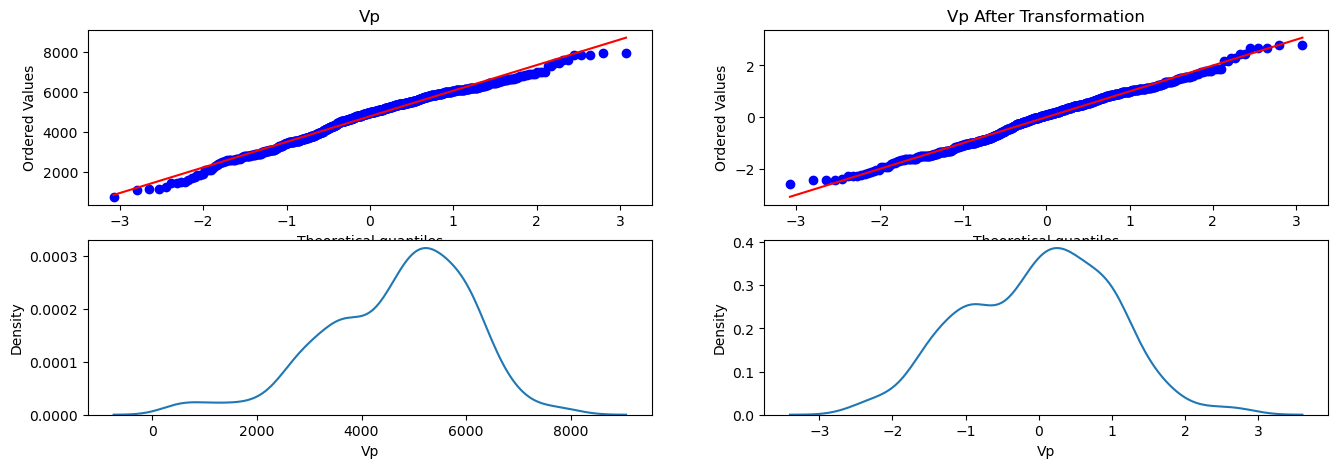

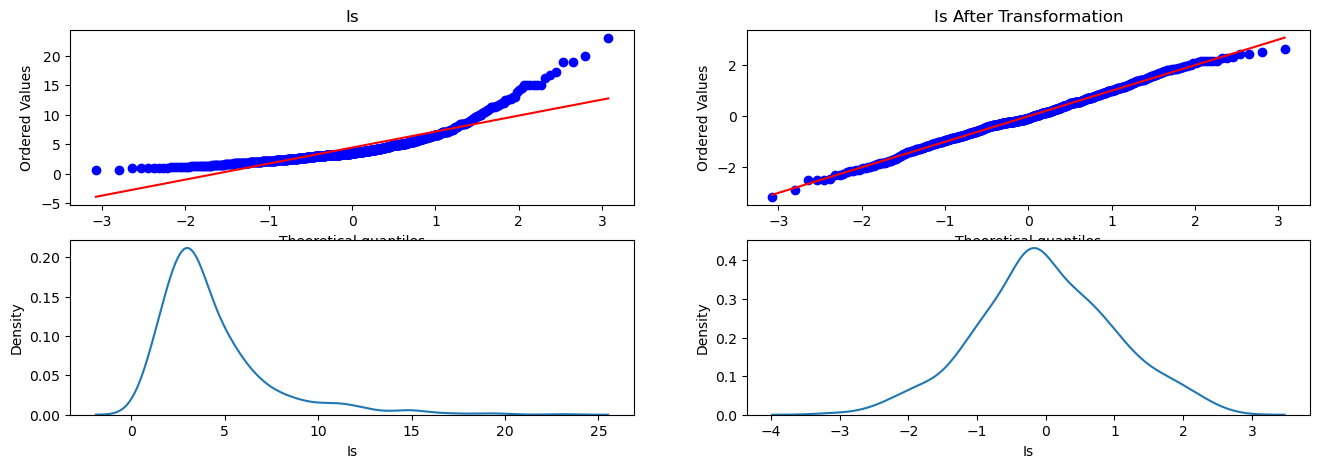

In [27]:
#visualising their respective QQPlots
for col in X.columns:
    plt.figure(figsize=(16,5))
    plt.subplot(2,2,1)
    stats.probplot(x=X_model_train[col],dist='norm',plot=plt)
    plt.title(col)
    plt.subplot(2,2,2)
    stats.probplot(x=X_model_train_transformed[col],dist='norm',plot=plt)
    plt.title(label=col+' After Transformation')
    plt.subplot(2,2,3)
    sns.kdeplot(x=X[col])
    plt.subplot(2,2,4)
    sns.kdeplot(x=X_model_train_transformed[col])
    plt.show()

In [28]:
X_model_train_transformed.skew()

SRn   -0.024905
Vp    -0.083833
Is     0.007844
dtype: float64

In [29]:
X_model_train_transformed

,SRn,Vp,Is
0,-0.466198,1.037591,-1.778043
1,-1.311547,-2.578997,-2.276044
2,-1.910070,-1.767446,-2.163981
3,0.385142,-0.296266,-1.831073
4,-0.827989,0.160704,-0.421415
...,...,...,...
651,0.628227,0.956548,0.542726
652,1.100170,0.450684,0.762150
653,1.629752,1.642589,1.427823
654,0.909623,1.032291,0.386136


In [30]:
#Similarly for test data
X_test.skew()

SRn    0.508018
Vp    -0.627608
Is     1.356120
dtype: float64

In [31]:
X_test_transformed

,SRn,Vp,Is
0,0.832676,-0.690875,0.608922
1,0.699869,-0.134307,0.909853
2,-1.067694,-1.600553,-1.293481
3,-1.737422,-1.723636,-1.509346
4,1.082505,0.391274,0.854075
...,...,...,...
68,-2.099469,-0.034870,-0.664861
69,0.832676,0.382689,-0.188426
70,0.784121,0.451488,0.968465
71,-1.067694,-0.403811,-1.063435


In [32]:

X_model_train_transformed.to_csv('Yin_X_model_train_transformed.csv', index=False) 

In [33]:
X_test_transformed.to_csv('Yin_X_test_transformed.csv', index=False) 

In [34]:
pwd

'C:\\Users\\USER\\Documents\\Received\\PYTHON\\Xin Yin\\WriteUp-Result 3-Research'

In [35]:
#Model Building


In [36]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, cross_val_score #for grid search
from bayes_opt import BayesianOptimization #for Bayesian Optimization
import pyswarms as ps #For Particle Swarm Algorithm (PSO)
from pyswarms.utils.search.grid_search import GridSearch
from scipy.optimize import differential_evolution #for Genetic Algorithms and Differential Evolution
from sklearn.metrics import accuracy_score
#numpy for BOA, WOA, ABCA, 

In [37]:
ABR = AdaBoostRegressor(random_state=42)
GBDT = GradientBoostingRegressor(random_state=42)
XGB = XGBRegressor(objective='reg:squarederror', random_state=42)
LGBM = LGBMRegressor(random_state=42)
RF = RandomForestRegressor(random_state=42)
ET = ExtraTreesRegressor(random_state=42)
ID3 = DecisionTreeRegressor(criterion='friedman_mse', random_state=42) #Iterative Dichotomiser 3 #a variation of standard decision tree algorithm, To specify the algorithm to be used, we can use the "criterion" parameter
C4_5 = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_features=None, random_state=42) #a variation of standard decision tree algorithm, To specify the algorithm to be used, we can use the "criterion" parameter
CART = DecisionTreeRegressor(criterion='absolute_error', random_state=42) #Classification and Regression Trees

# Train models

models = {'ABR': ABR, 'GBDT': GBDT, 'XGB': XGB, 'LGBM': LGBM, 'RF': RF, 'ET': ET, 'ID3': ID3, 'C4_5': C4_5, 'CART': CART}



In [38]:
resultsTT = []
for name, model in models.items():
    model.fit(X_model_train, y_model_train)

    # Make predictions on the training set
    y_pred_train = model.predict(X_model_train)

    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(y_model_train, y_pred_train))
    mae = mean_absolute_error(y_model_train, y_pred_train)
    vaf = 1 - (np.var(y_model_train - y_pred_train) / np.var(y_model_train))
    ns = 1 - mean_squared_error(y_model_train, y_pred_train) / np.var(y_model_train)
    wmape = np.mean(np.abs(y_model_train - y_pred_train) / np.abs(y_model_train))
    wmbe = np.mean(y_model_train - y_pred_train)
    r = np.corrcoef(y_model_train, y_pred_train)[0][1]
    r2 = r2_score(y_model_train, y_pred_train)
    resultsTT.append([name, rmse, mae, vaf, ns, wmape, wmbe, r, r2])
    
    # Print the performance metrics
    print(f"{name} - Training Set Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"VAF: {vaf:.3f}")
    print(f"NS: {ns:.3f}")
    print(f"WMAPE: {wmape:.3f}")
    print(f"WMBE: {wmbe:.3f}")
    print(f"R: {r:.3f}")
    print(f"R^2: {r2:.3f}\n")

    
# print the results
headersTT = ['Model', 'RMSE', 'MAE', 'VAF', 'NS', 'WMAPE', 'WMBE', 'R', 'R2']
print(pd.DataFrame(resultsTT, columns=headersTT))

ABR - Training Set Performance:
RMSE: 25.905
MAE: 21.881
VAF: 0.670
NS: 0.662
WMAPE: 0.475
WMBE: -4.161
R: 0.834
R^2: 0.662

GBDT - Training Set Performance:
RMSE: 19.317
MAE: 14.931
VAF: 0.812
NS: 0.812
WMAPE: 0.267
WMBE: 0.000
R: 0.903
R^2: 0.812

XGB - Training Set Performance:
RMSE: 2.931
MAE: 2.037
VAF: 0.996
NS: 0.996
WMAPE: 0.035
WMBE: 0.003
R: 0.998
R^2: 0.996

LGBM - Training Set Performance:
RMSE: 14.027
MAE: 10.612
VAF: 0.901
NS: 0.901
WMAPE: 0.191
WMBE: 0.000
R: 0.951
R^2: 0.901

RF - Training Set Performance:
RMSE: 9.885
MAE: 7.417
VAF: 0.951
NS: 0.951
WMAPE: 0.137
WMBE: -0.333
R: 0.979
R^2: 0.951

ET - Training Set Performance:
RMSE: 0.373
MAE: 0.021
VAF: 1.000
NS: 1.000
WMAPE: 0.000
WMBE: -0.000
R: 1.000
R^2: 1.000

ID3 - Training Set Performance:
RMSE: 0.373
MAE: 0.021
VAF: 1.000
NS: 1.000
WMAPE: 0.000
WMBE: 0.000
R: 1.000
R^2: 1.000

C4_5 - Training Set Performance:
RMSE: 0.373
MAE: 0.021
VAF: 1.000
NS: 1.000
WMAPE: 0.000
WMBE: 0.000
R: 1.000
R^2: 1.000

CART - Trainin

In [39]:
# print the predicted_results
train_predicts = pd.DataFrame(resultsTT, columns=headersTT)
train_predicts.to_csv('Yin_performances_predictings_trainingYs.csv', index=False)


In [40]:
pwd

'C:\\Users\\USER\\Documents\\Received\\PYTHON\\Xin Yin\\WriteUp-Result 3-Research'

In [41]:
def get_predictions(model, X_model_train, y_model_train, X_test, y_test):
    train_preds = model.predict(X_model_train)
    test_preds = model.predict(X_test)
    return train_preds, test_preds
# Create a list of models
models = {'ABR': ABR, 'GBDT': GBDT, 'XGB': XGB, 'LGBM': LGBM, 'RF': RF, 'ET': ET, 'ID3': ID3, 'C4_5': C4_5, 'CART': CART}

# Create a dictionary to store the predictions for each model
predictions = {}

# Loop through the models and get the predictions for each set
for name, model in models.items():
    train_preds, test_preds = get_predictions(model, X_model_train, y_model_train, X_test, y_test)
    predictions[name] = test_preds
    
# Convert the dictionary to a DataFrame and save to a CSV file
test_preds_alls_df = pd.DataFrame(predictions)
test_preds_alls_df.to_csv('Yin_test_preds-Ys_alls.csv', index=False)



In [42]:
predicted_train_y = pd.DataFrame(y_pred_train)
predicted_train_y.to_csv('Yin_predicted-train_y.csv', index=False)  #this generates just one prediction, all models are supposed to give predictions           

In [43]:

# Define a function to get the predictions for each set
def get_predictions1(model, X_model_train, y_model_train, X_test, y_test):
    train_preds = model.predict(X_model_train)
    test_preds = model.predict(X_test)
    return train_preds, test_preds

# Create a list of models
models = {'ABR': ABR, 'GBDT': GBDT, 'XGB': XGB, 'LGBM': LGBM, 'RF': RF, 'ET': ET, 'ID3': ID3, 'C4_5': C4_5, 'CART': CART}

# Create a dictionary to store the predictions for each model
predictions1 = {}


# Loop through the models and get the predictions for each set

for name, model in models.items():
    train_preds, test_preds = get_predictions1(model, X_model_train, y_model_train, X_test, y_test)
    predictions1[name] = train_preds   

# Convert the dictionary to a DataFrame and save to a CSV file
train_predicts_alls_df = pd.DataFrame(predictions1)
train_predicts_alls_df.to_csv('Yin_training-predictYs_as.csv', index=False)

In [44]:
pwd

'C:\\Users\\USER\\Documents\\Received\\PYTHON\\Xin Yin\\WriteUp-Result 3-Research'

In [45]:

# evaluate the models on testing set
resultsTS = []
for name, model in models.items():
    model.fit(X_model_train, y_model_train)
    y_pred_test = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae = mean_absolute_error(y_test, y_pred_test)
    vaf = 1 - np.var(y_test-y_pred_test)/np.var(y_test)
    ns = 1 - np.sum((y_test-y_pred_test)**2)/np.sum((y_test-np.mean(y_pred_test))**2)
    wmape = np.mean(np.abs((y_test - y_pred_test) / np.abs(y_test)))
    wbme = np.mean(y_test - y_pred_test)
    r = np.corrcoef(y_test, y_pred_test)[0,1]
    r2 = r2_score(y_test, y_pred_test)
    resultsTS.append([name, rmse, mae, vaf, ns, wmape, wbme, r, r2])
    
     # Print the performance metrics
    print(f"{name} - Testing Set Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"VAF: {vaf:.3f}")
    print(f"NS: {ns:.3f}")
    print(f"WMAPE: {wmape:.3f}")
    print(f"WMBE: {wmbe:.3f}")
    print(f"R: {r:.3f}")
    print(f"R^2: {r2:.3f}\n")

# print the results
headersTS = ['Model', 'RMSE', 'MAE', 'VAF', 'NS', 'WMAPE', 'WMBE', 'R', 'R2']
print(pd.DataFrame(resultsTS, columns=headersTS))

ABR - Testing Set Performance:
RMSE: 20.292
MAE: 17.101
VAF: 0.847
NS: 0.793
WMAPE: 1.636
WMBE: 0.000
R: 0.943
R^2: 0.778

GBDT - Testing Set Performance:
RMSE: 8.982
MAE: 6.821
VAF: 0.958
NS: 0.957
WMAPE: 0.278
WMBE: 0.000
R: 0.979
R^2: 0.957

XGB - Testing Set Performance:
RMSE: 10.531
MAE: 7.350
VAF: 0.944
NS: 0.941
WMAPE: 0.340
WMBE: 0.000
R: 0.978
R^2: 0.940

LGBM - Testing Set Performance:
RMSE: 8.857
MAE: 7.012
VAF: 0.960
NS: 0.958
WMAPE: 0.526
WMBE: 0.000
R: 0.980
R^2: 0.958

RF - Testing Set Performance:
RMSE: 5.385
MAE: 3.993
VAF: 0.986
NS: 0.984
WMAPE: 0.320
WMBE: 0.000
R: 0.993
R^2: 0.984

ET - Testing Set Performance:
RMSE: 5.202
MAE: 4.066
VAF: 0.986
NS: 0.985
WMAPE: 0.224
WMBE: 0.000
R: 0.993
R^2: 0.985

ID3 - Testing Set Performance:
RMSE: 13.983
MAE: 9.028
VAF: 0.896
NS: 0.895
WMAPE: 0.296
WMBE: 0.000
R: 0.949
R^2: 0.895

C4_5 - Testing Set Performance:
RMSE: 13.983
MAE: 9.028
VAF: 0.896
NS: 0.895
WMAPE: 0.296
WMBE: 0.000
R: 0.949
R^2: 0.895

CART - Testing Set Perform

In [46]:
testing_predicts = pd.DataFrame(resultsTS, columns=headersTS)
testing_predicts.to_csv('Yin_testing-predictions_metrics.csv', index=False)
predicted_test_y = pd.DataFrame(y_pred_test)
predicted_test_y.to_csv('Yin_predicted-test_values_all.csv', index=False)

In [47]:
pwd

'C:\\Users\\USER\\Documents\\Received\\PYTHON\\Xin Yin\\WriteUp-Result 3-Research'

In [48]:
# Define a function to get the predictions for each set
def get_predictions(model, X_model_train, y_model_train, X_test, y_test):
    train_preds = model.predict(X_model_train)
    test_preds = model.predict(X_test)
    return train_preds, test_preds

# Create a list of models
models = {'ABR': ABR, 'GBDT': GBDT, 'XGB': XGB, 'LGBM': LGBM, 'RF': RF, 'ET': ET, 'ID3': ID3, 'C4_5': C4_5, 'CART': CART}

# Create a dictionary to store the predictions for each model
predictions = {}


# Loop through the models and get the predictions for each set
for name, model in models.items():
    train_preds, test_preds = get_predictions(model, X_model_train, y_model_train, X_test, y_test)
    predictions[name] = test_preds
   
# Convert the dictionary to a DataFrame and save to a CSV file
test_preds_alls_df = pd.DataFrame(predictions)
test_preds_alls_df.to_csv('Yin_testing-preds_alls.csv', index=False)

In [49]:
pwd

'C:\\Users\\USER\\Documents\\Received\\PYTHON\\Xin Yin\\WriteUp-Result 3-Research'

In [50]:


#lssvm_train_trans_df = pd.DataFrame(lssvm.predict(X_model_train_transformed))
#lssvm_train_trans_df.to_csv('lssvm_train_preds_trans.csv', index=False)
#lssvm_test_trans_df = pd.DataFrame(lssvm.predict(X_test_transformed))
#lssvm_test_trans_df.to_csv('lssvm_test_preds_trans.csv', index=False)
#lssvm_val_trans_df = pd.DataFrame(lssvm.predict(X_val_transformed))
#lssvm_val_trans_df.to_csv('lssvm_val_preds_trans.csv', index=False)





In [51]:
#to discover what the initial hyperparameters were:
ABR.fit(X_model_train, y_model_train)

AdaBoostRegressor(random_state=42)

In [52]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import cross_val_score


# Define the objective function to be optimized
def optimize_DecisionTreeRegressor(max_depth, min_samples_split, min_samples_leaf, max_features, max_leaf_nodes,):
    # Create the DecisionTreeRegressor model with given hyperparameters
    model = DecisionTreeRegressor( max_depth=int(max_depth), min_samples_split=int(min_samples_split), min_samples_leaf=int(min_samples_leaf), max_features=int(max_features), max_leaf_nodes=int(max_leaf_nodes))
    # Calculate the cross-validation scores of the model
    scores = cross_val_score(model, X_model_train, y_model_train, cv=10, scoring='neg_mean_squared_error')
    # Return the average score across all cross-validation folds
    return np.mean(scores)



#start = time.time()
# Define the search space for the hyperparameters
pbounds = {'max_depth': (1, 200), 'min_samples_split': (1, 2 ), 'min_samples_leaf': (1, 20), 'max_features': (1, 4), 'max_leaf_nodes': (10,100),}


     
# Create the Bayesian optimization object with the objective function and search space
optimizer = BayesianOptimization(f=optimize_DecisionTreeRegressor, pbounds=pbounds, random_state=42)

# Perform the optimization
optimizer.maximize(init_points=10, n_iter=50)

# Get the best hyperparameters
#est_n_estimators = optimizer.max['params']['n_estimators']
#best_min_child_samples = optimizer.max['params']['min_child_samples']
best_max_depth = optimizer.max['params']['max_depth']
best_min_samples_split = optimizer.max['params']['min_samples_split']
best_min_samples_leaf = optimizer.max['params']['min_samples_leaf']
#est_max_features = optimizer.max['params']['max_features']
#best_learning_rate = optimizer.max['params']['learning_rate']
best_max_leaf_nodes = optimizer.max['params']['max_leaf_nodes']
#est_boostrap = optimizer.max['params']['boostrap']
#best_reg_alpha = optimizer.max['params']['reg_alpha']
#best_colsample_bytree = optimizer.max['params']['colsample_bytree']
# Print the best hyperparameters
#rint(f"Best n_estimators: {best_n_estimators}")
print(f"Best max_depth: {best_max_depth}")
print(f"Best min_samples_split: {best_min_samples_split}")

#print(f"Best min_child_samples: {best_min_child_samples}")
print(f"Best min_samples_leaf: {best_min_samples_leaf}")
#rint(f"Best max_features: {best_max_features}")
#print(f"Best learning_rate: {best_learning_rate}")
print(f"Best max_leaf_nodes: {best_max_leaf_nodes}")
#rint(f"Best boostrap: {best_boostrap}")
#print(f"Best reg_alpha: {best_reg_alpha}")
#print(f"Best colsample_bytree: {best_colsample_bytree}")




# Use the best hyperparameters to train the final model
model = DecisionTreeRegressor(max_depth=int(best_max_depth), min_samples_split=int(best_min_samples_split), min_samples_leaf=int(best_min_samples_leaf), max_leaf_nodes=int(best_max_leaf_nodes), random_state=42)
model.fit(X_model_train, y_model_train)
y_pred_train = model.predict(X_model_train)
y_pred_test=model.predict(X_test)
Trainingset_rmse = np.sqrt(mean_squared_error(y_model_train, y_pred_train))
Testset_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE on Training Set for the new model is", Trainingset_rmse)
print("RMSE on Test Set for the new model is", Testset_rmse)
#print("This process consumed %s minutes:" % ((time.time() - start)/60))

ModuleNotFoundError: No module named 'skopt'

In [ ]:
#Best n_estimators: 1941.3242117158889, Best learning_rate: 0.03037864935284442, RMSE for the new model is 25.412847319624795
#BasedOn BayesianOptimization
ABR = AdaBoostRegressor(learning_rate=0.03037864935284442, n_estimators=971, random_state=42)
GBDT = GradientBoostingRegressor(n_estimators= int(71.89269734799326), max_depth= int(8.242220351700581), min_samples_split= int(2.308285809742533), min_samples_leaf= int(9.767095449614672), random_state=42)
XGB = XGBRegressor(n_estimators = int(306.9098001650474), max_depth = int(10.0), min_child_weight = (10.0), reg_lambda = (1.0), learning_rate = (0.01), gamma = (1.0),  subsample = (1.0), reg_alpha = (1.0), colsample_bytree = (1.0), objective='reg:squarederror', random_state=42)
LGBM = LGBMRegressor(n_estimators = int(27.57525722125984), num_leaves = int(178.38937797472082), max_depth = int(13.437060376068947), min_child_weight = (0.6486966429940462), reg_lambda = (0.018175963826942976), learning_rate = (0.27025371225996475), min_data_in_leaf = int(12.734588444634852), subsample = (0.8961175313237542), reg_alpha = (0.31808734945593653), colsample_bytree = (0.8981035311266471),    random_state=42)
RF = RandomForestRegressor(n_estimators = int(224.2536150863089), max_depth = int (100.0), min_samples_split = int(1.0), min_samples_leaf = int(1.0), max_features = int(4.0), random_state=42)
ET = ExtraTreesRegressor(n_estimators = int(270.8714437424529), max_depth = int(31.730510436614694), min_samples_split= int(3.6499521339233754), min_samples_leaf = int(1.7099839564601607), random_state=42)
ID3 = DecisionTreeRegressor(max_depth = int(81.08719353205689), min_samples_split= int(1.0),  min_samples_leaf = int(13.03277896427914), max_leaf_nodes = int(62.143548464469966), criterion='friedman_mse', random_state=42) #Iterative Dichotomiser 3 #a variation of standard decision tree algorithm, To specify the algorithm to be used, we can use the "criterion" parameter
C4_5 = DecisionTreeRegressor(max_depth = int(81.08719353205689), min_samples_split= int(1.0),  min_samples_leaf = int(13.03277896427914), max_leaf_nodes = int(62.143548464469966), criterion='friedman_mse', splitter='best', max_features=None, random_state=42) #a variation of standard decision tree algorithm, To specify the algorithm to be used, we can use the "criterion" parameter
CART = DecisionTreeRegressor(max_depth = int(81.08719353205689), min_samples_split= int(1.0),  min_samples_leaf = int(13.03277896427914), max_leaf_nodes = int(62.143548464469966), criterion='absolute_error', random_state=42) #Classification and Regression Trees

# Train models

models = {'ABR': ABR, 'GBDT': GBDT, 'XGB': XGB, 'LGBM': LGBM, 'RF': RF, 'ET': ET, 'ID3': ID3, 'C4_5': C4_5, 'CART': CART}
resultsBT = []
for name, model in models.items():
    model.fit(X_model_train, y_model_train)

    # Make predictions on the training set
    y_pred_train = model.predict(X_model_train)

    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(y_model_train, y_pred_train))
    mae = mean_absolute_error(y_model_train, y_pred_train)
    vaf = 1 - (np.var(y_model_train - y_pred_train) / np.var(y_model_train))
    ns = 1 - mean_squared_error(y_model_train, y_pred_train) / np.var(y_model_train)
    wmape = np.mean(np.abs(y_model_train - y_pred_train) / np.abs(y_model_train))
    wmbe = np.mean(y_model_train - y_pred_train)
    r = np.corrcoef(y_model_train, y_pred_train)[0][1]
    r2 = r2_score(y_model_train, y_pred_train)
    resultsBT.append([name, rmse, mae, vaf, ns, wmape, wmbe, r, r2])
    
    # Print the performance metrics
    print(f"{name} - Training Set Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"VAF: {vaf:.3f}")
    print(f"NS: {ns:.3f}")
    print(f"WMAPE: {wmape:.3f}")
    print(f"WMBE: {wmbe:.3f}")
    print(f"R: {r:.3f}")
    print(f"R^2: {r2:.3f}\n")

    
# print the results
headersBT = ['Model', 'RMSE', 'MAE', 'VAF', 'NS', 'WMAPE', 'WMBE', 'R', 'R2']
print(pd.DataFrame(resultsBT, columns=headersBT))

In [ ]:
testing_predicts = pd.DataFrame(resultsBT, columns=headersBT)
testing_predicts.to_csv('Yin_Optimizedtraining_predictions_metrics.csv', index=False)
#predicted_test_y = pd.DataFrame(y_pred_test)
#predicted_test_y.to_csv('Yin_predicted_test_values_all.csv', index=False)

In [ ]:
# evaluate the models on testing set
resultsBS = []
for name, model in models.items():
    model.fit(X_model_train, y_model_train)
    y_pred_test = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae = mean_absolute_error(y_test, y_pred_test)
    vaf = 1 - np.var(y_test-y_pred_test)/np.var(y_test)
    ns = 1 - np.sum((y_test-y_pred_test)**2)/np.sum((y_test-np.mean(y_pred_test))**2)
    wmape = np.mean(np.abs((y_test - y_pred_test) / np.abs(y_test)))
    wbme = np.mean(y_test - y_pred_test)
    r = np.corrcoef(y_test, y_pred_test)[0,1]
    r2 = r2_score(y_test, y_pred_test)
    resultsBS.append([name, rmse, mae, vaf, ns, wmape, wbme, r, r2])
    
     # Print the performance metrics
    print(f"{name} - Testing Set Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"VAF: {vaf:.3f}")
    print(f"NS: {ns:.3f}")
    print(f"WMAPE: {wmape:.3f}")
    print(f"WMBE: {wmbe:.3f}")
    print(f"R: {r:.3f}")
    print(f"R^2: {r2:.3f}\n")

# print the results
headersBS = ['Model', 'RMSE', 'MAE', 'VAF', 'NS', 'WMAPE', 'WMBE', 'R', 'R2']
print(pd.DataFrame(resultsBS, columns=headersBS))

In [ ]:
testing_predicts = pd.DataFrame(resultsBS, columns=headersBS)
testing_predicts.to_csv('Yin_Optimizedtesting_prdictions_metrics.csv', index=False)

In [ ]:

# Define a function to get the predictions for each set
def get_predictions1(model, X_model_train, y_model_train, X_test, y_test):
    train_preds = model.predict(X_model_train)
    test_preds = model.predict(X_test)
    return train_preds, test_preds

# Create a list of models
models = {'ABR': ABR, 'GBDT': GBDT, 'XGB': XGB, 'LGBM': LGBM, 'RF': RF, 'ET': ET, 'ID3': ID3, 'C4_5': C4_5, 'CART': CART}

# Create a dictionary to store the predictions for each model
predictions1 = {}


# Loop through the models and get the predictions for each set

for name, model in models.items():
    train_preds, test_preds = get_predictions1(model, X_model_train, y_model_train, X_test, y_test)
    predictions1[name] = train_preds   

# Convert the dictionary to a DataFrame and save to a CSV file
train_predicts_alls_df = pd.DataFrame(predictions1)
train_predicts_alls_df.to_csv('Yin_Opttraining-predictYs.csv', index=False)

testing_predicts = pd.DataFrame(resultsBS, columns=headersBS)
testing_predicts.to_csv('Yin_Opttesting-predictions_metrics.csv', index=False)
predicted_test_y = pd.DataFrame(y_pred_test)
predicted_test_y.to_csv('Yin_Optpredicted-test_values_all.csv', index=False)

# Define a function to get the predictions for each set
def get_predictions(model, X_model_train, y_model_train, X_test, y_test):
    train_preds = model.predict(X_model_train)
    test_preds = model.predict(X_test)
    return train_preds, test_preds

# Create a list of models
models = {'ABR': ABR, 'GBDT': GBDT, 'XGB': XGB, 'LGBM': LGBM, 'RF': RF, 'ET': ET, 'ID3': ID3, 'C4_5': C4_5, 'CART': CART}

# Create a dictionary to store the predictions for each model
predictions = {}


# Loop through the models and get the predictions for each set
for name, model in models.items():
    train_preds, test_preds = get_predictions(model, X_model_train, y_model_train, X_test, y_test)
    predictions[name] = test_preds
   
# Convert the dictionary to a DataFrame and save to a CSV file
test_preds_alls_df = pd.DataFrame(predictions)
test_preds_alls_df.to_csv('Yin_Optimizedtesting-preds_alls.csv', index=False)

In [57]:
import joblib

# Train and save your scikit-learn model
model = RandomForestRegressor(n_estimators = int(224.2536150863089), max_depth = int (100.0), min_samples_split = int(1.0), min_samples_leaf = int(1.0), max_features = int(4.0), random_state=42)  # Your trained scikit-learn model
joblib.dump(model, "model.joblib")


import gradio as gr
import warnings
warnings.filterwarnings('ignore')

RF = RandomForestRegressor(n_estimators = int(224.2536150863089), max_depth = int (100.0), min_samples_split = int(1.0), min_samples_leaf = int(1.0), max_features = int(4.0), random_state=42)
ET = ExtraTreesRegressor(n_estimators = int(270.8714437424529), max_depth = int(31.730510436614694), min_samples_split= int(3.6499521339233754), min_samples_leaf = int(1.7099839564601607), random_state=42)
RF = joblib.load("model.joblib")

RF.fit(X_model_train, y_model_train)

def UniaxialCompressiveStrength(SRn, Vp, Is):
    X = np.array([SRn, Vp, Is])
    prediction = RF.predict(X.reshape(1, -1))
    return prediction

outputs = gr.outputs.Textbox()
app = gr.Interface(fn=UniaxialCompressiveStrength, inputs=['number','number','number'], outputs=outputs,description="This is a Uniaxial Compressive Strength Prediction Model")
app.launch(share=True)

#To provide a shareable link
#app.launch(share=True)

Running on local URL:  http://127.0.0.1:7863
Running on public URL: https://d8faefe341f846a3bb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [59]:
pwd

'C:\\Users\\USER\\Documents\\Received\\PYTHON\\Xin Yin\\WriteUp-Result 3-Research'

In [ ]:
import streamlit as st
 
st.title('Uniaxial Compressive Strength prediction')
 
st.write('---')
 
# SRn 
SRn = st.number_input('SRn')
 
# Vp
Vp = st.radio('Vp', min_value=0, step=1)
 
# Is
Is = st.number_input('Is', min_value=0, step=1)
 
RF = RandomForestRegressor(n_estimators = int(224.2536150863089), max_depth = int (100.0), min_samples_split = int(1.0), min_samples_leaf = int(1.0), max_features = int(4.0), random_state=42)
ET = ExtraTreesRegressor(n_estimators = int(270.8714437424529), max_depth = int(31.730510436614694), min_samples_split= int(3.6499521339233754), min_samples_leaf = int(1.7099839564601607), random_state=42)

RF.fit(X_model_train, y_model_train)

input_data =  np.array([SRn, Vp_(m/s), Is_(Mpa)])
predict_UCS = RF.predict(input_data)
st.subheader('UCS in MPa is:', predict_UCS)

'''  
def UniaxialCompressiveStrength(SRn, Vp, Is):
    X = np.array([SRn, Vp, Is])
    prediction = RF.predict(X.reshape(1, -1))
    return prediction

if st.button('Predict Uniaxial Compressive Strength'):
    UCS = predict(np.array([[SRn, Vp, Is]]))
    st.text(UCS[0])


'''

In [ ]:
streamlit run app.py

In [ ]:
import PySimpleGUI as sg


# Define the layout of the GUI
layout = [
    [sg.Text("SRn"), sg.Input(key="-INPUT1-")],
    [sg.Text("Vp (m/s)"), sg.Input(key="-INPUT2-")],
    [sg.Text("Is (Mpa)"), sg.Input(key="-INPUT3-")],
    [sg.Button("Predict UCS (Mpa)"), sg.Button("Exit")],
    [sg.Text("Prediction of UCS (MPa): "), sg.Text(size=(20, 1), key="-OUTPUT-")]
]

# Define the layout of the GUI
layout = [
    [sg.Text("SRn:"), sg.InputText(key='input1')],
    [sg.Text("Vp (m/s):"), sg.InputText(key='input2')],
    [sg.Text("Is (Mpa):"), sg.InputText(key='input3')],
    [sg.Button("Predict"), sg.Button("Exit")],
    [sg.Text("UCS (Mpa) Prediction:", size=(40, 1), key='output')]
]

# Create the window
window = sg.Window("Uniaxial Compressive Strength Predictor", layout)



# Event loop to handle user interactions
while True:
    event, values = window.read()
    if event == sg.WINDOW_CLOSED or event == 'Exit':
        break
    elif event == 'Predict':
        # Get the input values
        input1 = float(values['input1'])
        input2 = float(values['input2'])
        input3 = float(values['input3'])

        # Load your trained regressor model
        model = RandomForestRegressor()  # Replace with your trained model
        RF = RandomForestRegressor(n_estimators = int(224.2536150863089), max_depth = int (100.0), min_samples_split = int(1.0), min_samples_leaf = int(1.0), max_features = int(4.0), random_state=42)
        RF.fit(X_model_train, y_model_train)
        
        # Perform the prediction
        prediction = RF.predict([[input1, input2, input3]])

        # Update the output text
        window['output'].update(f"Prediction: {prediction[0]}")

# Close the window
window.close()


'''
# Load your trained regressor model
RF = RandomForestRegressor(n_estimators = int(224.2536150863089), max_depth = int (100.0), min_samples_split = int(1.0), min_samples_leaf = int(1.0), max_features = int(4.0), random_state=42)
ET = ExtraTreesRegressor(n_estimators = int(270.8714437424529), max_depth = int(31.730510436614694), min_samples_split= int(3.6499521339233754), min_samples_leaf = int(1.7099839564601607), random_state=42)

RF.fit(X_model_train, y_model_train)

def UniaxialCompressiveStrength(SRn, Vp, Is):
    X = np.array([SRn, Vp, Is])
    prediction = RF.predict(X.reshape(1, -1))
    return prediction

# Event loop to process GUI events
while True:
    event, values = window.read()

    # Exit the program if the window is closed or "Exit" button is clicked
    if event == sg.WINDOW_CLOSED or event == "Exit":
        break

    # Perform the prediction when the "Predict" button is clicked
    if event == "Predict":
        try:
            # Get the input values from the GUI
            input1 = float(values["-INPUT1-"])
            input2 = float(values["-INPUT2-"])
            input3 = float(values["-INPUT3-"])

            # Perform the prediction
            prediction = RF.predict([[input1, input2, input3]])

            # Update the output label with the prediction
            window["-OUTPUT-"].update(f"Prediction: {prediction[0]}")

        except ValueError:
            sg.popup("Invalid input. Please enter numeric values.")

# Close the window
window.close()




'''


In [ ]:
import PySimpleGUI as sg

sg.Window(title="Welcome to this ML model GUI", layout=[[]], margins=(100, 50)).read()
layout = [[sg.Text("Uniaxial Compressive Strength Prediction for Rocks")], [sg.Button("OK")]]


RF = RandomForestRegressor(n_estimators = int(224.2536150863089), max_depth = int (100.0), min_samples_split = int(1.0), min_samples_leaf = int(1.0), max_features = int(4.0), random_state=42)
ET = ExtraTreesRegressor(n_estimators = int(270.8714437424529), max_depth = int(31.730510436614694), min_samples_split= int(3.6499521339233754), min_samples_leaf = int(1.7099839564601607), random_state=42)

RF.fit(X_model_train, y_model_train)

def UniaxialCompressiveStrength(SRn, Vp, Is):
    X = np.array([SRn, Vp, Is])
    prediction = RF.predict(X.reshape(1, -1))
    return prediction

def uniaxialcompressivestrength(SRn, Vp, Is):
#turning the arguments into a numpy array  
 x = np.array([SRn, Vp(m/s), Is])

 prediction = model.predict(x.reshape(1, -1))

 return prediction

outputs = sg.outputs.Textbox()

app = sg.Interface(fn=diabetes, inputs=['number','number','number'], outputs=outputs,description="This is a Uniaxial Compressive Strength Prediction model")


In [ ]:
import tkinter as tk
from tkinter import messagebox


# Create the main application window
window = tk.Tk()
window.title("Uniaxial Compressive Strength Predictor GUI")

# Create input labels
label1 = tk.Label(window, text="SRn:")
label1.pack()
input1 = tk.Entry(window)
input1.pack()

label2 = tk.Label(window, text="Vp (m/s):")
label2.pack()
input2 = tk.Entry(window)
input2.pack()

label3 = tk.Label(window, text="Is (Mpa):")
label3.pack()
input3 = tk.Entry(window)
input3.pack()

# Create output label
output_label = tk.Label(window, text="UCS (Mpa):")
output_label.pack()

# Load your trained regressor model
#regressor = RandomForestRegressor()  # Replace with your trained regressor model
RF = RandomForestRegressor(n_estimators = int(224.2536150863089), max_depth = int (100.0), min_samples_split = int(1.0), min_samples_leaf = int(1.0), max_features = int(4.0), random_state=42)
ET = ExtraTreesRegressor(n_estimators = int(270.8714437424529), max_depth = int(31.730510436614694), min_samples_split= int(3.6499521339233754), min_samples_leaf = int(1.7099839564601607), random_state=42)

RF.fit(X_model_train, y_model_train)

#input_data =  np.array([SRn, Vp_(m/s), Is_(Mpa)])
#predict_UCS = RF.predict(input_data)

# Train the model on your training data
# X_train, y_train = load_training_data()  # Replace with your training data
# regressor.fit(X_train, y_train)

# Function to handle button click event
def predict():
    try:
        # Get input values
        value1 = float(input1.get())
        value2 = float(input2.get())
        value3 = float(input3.get())

        # Perform prediction using the regressor model
        input_data = np.array([[value1, value2, value3]])
        prediction = RF.predict(input_data)

        # Update the output label
        output_label.config(text="UCS Prediction (Mpa): " + str(prediction))

    except ValueError:
        messagebox.showerror("Error", "Invalid input values. Please enter numeric values.")

# Create predict button
predict_button = tk.Button(window, text="Predict", command=predict)
predict_button.pack()

# Run the GUI application
window.mainloop()


In [ ]:
from tkinter import *
from tkinter import messagebox
from tkinter.tix import *
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import os


window = Tk()
window.title("Uniaxial Compressive Strength Prediction")
window.geometry("800x500")

tip = Balloon(window)

lblsrn = Label(window,text="SRn: ",anchor="w")
lblsrn.place(x=50,y=50,width=100)


txtsrn = Entry(window)
txtsrn.place(x=150,y=50,width=100)
SRn = txtsrn

lblvp = Label(window,text="Vp (m/s): ",anchor="w")
lblvp.place(x=50,y=75,width=100)


txtvp = Entry(window)
txtvp.place(x=150,y=75,width=100)
Vp = txtvp

lblIs = Label(window,text="Is (Mpa): ",anchor="w")
lblIs.place(x=50,y=75,width=100)

txtIs = Entry(window)
txtIs.place(x=150,y=75,width=100)
Is = txtIs

btnadd = Button(window,text="Add/Update",command=add)
btnadd.place(x=50,y=100,width=100)

btndelete = Button(window,text="Delete",command=delete)
btndelete.place(x=150,y=100,width=100)

btnclear = Button(window,text="Clear",command=clearplot)
btnclear.place(x=150,y=125,width=100)

btnsave = Button(window,text="Save Data",command=savedata)
btnsave.place(x=50,y=150,width=100)

btnopen = Button(window,text="Open Data",command=opendata)
btnopen.place(x=150,y=150,width=100)




window.mainloop()

RF = RandomForestRegressor(n_estimators = int(224.2536150863089), max_depth = int (100.0), min_samples_split = int(1.0), min_samples_leaf = int(1.0), max_features = int(4.0), random_state=42)
ET = ExtraTreesRegressor(n_estimators = int(270.8714437424529), max_depth = int(31.730510436614694), min_samples_split= int(3.6499521339233754), min_samples_leaf = int(1.7099839564601607), random_state=42)

RF.fit(X_model_train, y_model_train)

input_data =  np.array([SRn, Vp, Is])
predict_UCS = RF.predict(input_data)

lblpredict_UCS = Label(window,text="UCS (MPa): ",anchor="w")
lblpredict_UCS.place(x=50,y=350,width=100)

txtpredict_UCS = Entry(window)
txtpredict_UCS.place(x=150,y=350,width=100)


def delete():
  try:
     d = lstdistance.get(lstdistance.curselection())
     if d in distances:
        i = distances.index(d)
        del distances[i]
        del fares[i]
        lstdistance.delete(i)
        lstfare.delete(i)
        lstpredfare.delete(i)
        plot()
  except:
        pass


def savedata():
  pd.DataFrame(data).to_csv("data.csv",index=False)

def opendata():
      if os.path.exists("data.csv"):
          data = pd.read_csv("data.csv")
          values = data.values
          lstdistance.delete(0,END)
          lstfare.delete(0,END)
          distances.clear()
          fares.clear()
          for row in values:
               lstdistance.insert(END,row[0])
               distances.append(str(row[0]))
               lstfare.insert(END,row[1])
               fares.append(str(row[1]))
      else:
          messagebox.showerror("Error","No data found to load")

In [ ]:
# import necessary libraries

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import cross_val_score

# define hyperparameter search space for each model
ada_params = {'n_estimators': Integer(10, 1000),
              'learning_rate': Real(0.01, 1.0)}

gbdt_params = {'n_estimators': Integer(10, 1000),
               'max_depth': Integer(2, 10),
               'min_samples_split': Integer(2, 10)}
    learning rate, max_features, max_samples_leaf

xgb_params = {'n_estimators': Integer(10, 1000),
              'max_depth': Integer(2, 10),
              'learning_rate': Real(0.01, 1.0)}

lgb_params = {'n_estimators': Integer(10, 1000),
              'max_depth': Integer(2, 10),
              'learning_rate': Real(0.01, 1.0)}

rf_params = {'n_estimators': Integer(10, 1000),
             'max_depth': Integer(2, 10),
             'min_samples_split': Integer(2, 10)}

et_params = {'n_estimators': Integer(10, 1000),
             'max_depth': Integer(2, 10),
             'min_samples_split': Integer(2, 10)}
# Define parameter space for each model
adaboost_params = [Integer(50, 500, name='n_estimators'),
                   Real(0.01, 1.0, name='learning_rate')]

gbdt_params = [Integer(50, 500, name='n_estimators'),
               Real(0.01, 1.0, name='learning_rate'),
               Integer(2, 10, name='max_depth')]

xgboost_params = [Integer(50, 500, name='n_estimators'),
                  Real(0.01, 1.0, name='learning_rate'),
                  Real(0.1, 10.0, name='gamma'),
                  Integer(1, 10, name='max_depth')]

lgbm_params = [Integer(50, 500, name='n_estimators'),
               Real(0.01, 1.0, name='learning_rate'),
               Integer(2, 10, name='max_depth')]

rf_params = [Integer(10, 100, name='n_estimators'),
             Integer(2, 10, name='max_depth')]

et_params = [Integer(10, 100, name='n_estimators'),
             Integer(2, 10, name='max_depth')]

id3_params = [Integer(1, 10, name='max_depth')]

c45_params = [Integer(1, 10, name='max_depth')]

cart_params = [Integer(1, 10, name='max_depth')]
# create the models
ada = AdaBoostRegressor()
gbdt = GradientBoostingRegressor()
xgb = XGBRegressor()
lgb = LGBMRegressor()
rf = RandomForestRegressor()
et = ExtraTreesRegressor()

# create the parameter search space
model_params = {'adaboost': ada_params,
                'gbdt': gbdt_params,
                'xgboost': xgb_params,
                'lightgbm': lgb_params,
                'rf': rf_params,
                'et': et_params}

# create the model search space
model_space = {'adaboost': ada,
               'gbdt': gbdt,
               'xgboost': xgb,
               'lightgbm': lgb,
               'rf': rf,
               'et': et}

# create the bayesian optimizer object
optimizer = BayesSearchCV[estimator==model_space,
                          search_spaces==model_params,
                          n_jobs==-1,
                          cv==10]


# fit the optimizer on the training data
optimizer.fit(model_train_X, model_train_y)

# print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", optimizer.best_params_)
print("Best Score: ", optimizer.best_score_)


In [ ]:

from skopt import BayesSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# define the model
model = AdaBoostRegressor()

# define the parameter search space
search_spaces = {
    'n_estimators': (10, 100),
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'loss': ['linear', 'square', 'exponential'],
    'random_state': [42]
}

# define the objective function to minimize
mse = make_scorer(mean_squared_error, greater_is_better=False)
opt = BayesSearchCV(model, search_spaces, cv=10, n_jobs=-1, scoring=mse)

# fit the optimizer to the data
opt.fit(X_model_train, y_model_train)

# print the best hyperparameters and their corresponding score
print("Best Hyperparameters:", opt.best_params_)
print("Best Score:", -opt.best_score_)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.2f}, Test R2: {r2:.2f}")

In [ ]:
#Bayesian Optimization
#First, we need to define the objective function that we want to optimize. In this case, we want to optimize the mean squared error (MSE) of the models using 10-fold cross-validation:


from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.callbacks import CheckpointSaver, DeltaYStopper
from sklearn.metrics import make_scorer


# Define scoring function (negative mean squared error)
scoring_func = make_scorer(lambda y_true, y_pred: -mean_squared_error(y_true, y_pred))

# Define parameter space for each model
adaboost_params = [Integer(50, 500, name='n_estimators'),
                   Real(0.01, 1.0, name='learning_rate')]

gbdt_params = [Integer(50, 500, name='n_estimators'),
               Real(0.01, 1.0, name='learning_rate'),
               Integer(2, 10, name='max_depth')]

xgboost_params = [Integer(50, 500, name='n_estimators'),
                  Real(0.01, 1.0, name='learning_rate'),
                  Real(0.1, 10.0, name='gamma'),
                  Integer(1, 10, name='max_depth')]

lgbm_params = [Integer(50, 500, name='n_estimators'),
               Real(0.01, 1.0, name='learning_rate'),
               Integer(2, 10, name='max_depth')]

rf_params = [Integer(10, 100, name='n_estimators'),
             Integer(2, 10, name='max_depth')]

et_params = [Integer(10, 100, name='n_estimators'),
             Integer(2, 10, name='max_depth')]

id3_params = [Integer(1, 10, name='max_depth')]

c45_params = [Integer(1, 10, name='max_depth')]

cart_params = [Integer(1, 10, name='max_depth')]


# Define the objective function to optimize hyperparameters
def objective_function_adaboost(n_estimators, learning_rate):
    model = AdaBoostRegressor(n_estimators=int(n_estimators), learning_rate=learning_rate, random_state=0)
    score = -1.0 * np.mean(cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    return score
print("ABR", scoring_func)

def objective_function_gbdt(n_estimators, learning_rate, max_depth):
    model = GradientBoostingRegressor(n_estimators=int(n_estimators), learning_rate=learning_rate, max_depth=int(max_depth), random_state=0)
    score = -1.0 * np.mean(cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    return score

def objective_function_xgboost(n_estimators, learning_rate, max_depth, min_child_weight, subsample, colsample_bytree):
    model = XGBRegressor(n_estimators=int(n_estimators), learning_rate=learning_rate, max_depth=int(max_depth), min_child_weight=min_child_weight, subsample=subsample, colsample_bytree=colsample_bytree, random_state=0)
    score = -1.0 * np.mean(cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    return score

def objective_function_lightgbm(n_estimators, learning_rate, max_depth, min_child_weight, subsample, colsample_bytree):
    model = LGBMRegressor(n_estimators=int(n_estimators), learning_rate=learning_rate, max_depth=int(max_depth), min_child_weight=min_child_weight, subsample=subsample, colsample_bytree=colsample_bytree, random_state=0)
    score = -1.0 * np.mean(cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    return score

def objective_function_rf(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    model = RandomForestRegressor(n_estimators=int(n_estimators), max_depth=int(max_depth), min_samples_split=int(min_samples_split), min_samples_leaf=int(min_samples_leaf), random_state=0)
    score = -1.0 * np.mean(cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    return score

def objective_function_et(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    model = ExtraTreesRegressor(n_estimators=int(n_estimators), max_depth=int(max_depth), min_samples_split=int(min_samples_split), min_samples_leaf=int(min_samples_leaf), random_state=0)
    score = -1.0 * np.mean(cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    return score

def objective_function_id3(max_depth):
    model = DecisionTreeRegressor(criterion='mse', max_depth=int(max_depth), random_state=0)
    score = -1.0 * np.mean(cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    return score

def objective_function_c45(max_depth):
    model = DecisionTreeRegressor(criterion='mae', max_depth=int(max_depth), random_state=0)
    score = -1.0 * np.mean(cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    return score



In [ ]:
pwd

In [ ]:


svm_train_df = pd.DataFrame(svm.predict(X_model_train))
svm_train_df.to_csv('svm_train_preds.csv', index=False)
svm_test_df = pd.DataFrame(svm.predict(X_test))
svm_test_df.to_csv('svm_test_preds.csv', index=False)
svm_val_df = pd.DataFrame(svm.predict(X_val))
svm_val_df.to_csv('svm_val_preds.csv', index=False)

gpr_train_df = pd.DataFrame(gpr.predict(X_model_train))
gpr_train_df.to_csv('gpr_train_preds.csv', index=False)
gpr_test_df = pd.DataFrame(gpr.predict(X_test))
gpr_test_df.to_csv('gpr_test_preds.csv', index=False)
gpr_val_df = pd.DataFrame(gpr.predict(X_val))
gpr_val_df.to_csv('gpr_val_preds.csv', index=False)

dt_train_df = pd.DataFrame(dt.predict(X_model_train))
dt_train_df.to_csv('dt_train_preds.csv', index=False)
dt_test_df = pd.DataFrame(dt.predict(X_test))
dt_test_df.to_csv('dt_test_preds.csv', index=False)
dt_val_df = pd.DataFrame(dt.predict(X_val))
dt_val_df.to_csv('dt_val_preds.csv', index=False)

et_train_df = pd.DataFrame(et.predict(X_model_train))
et_train_df.to_csv('et_train_preds.csv', index=False)
et_test_df = pd.DataFrame(et.predict(X_test))
et_test_df.to_csv('et_test_preds.csv', index=False)
et_val_df = pd.DataFrame(et.predict(X_val))
et_val_df.to_csv('et_val_preds.csv', index=False)

rf_train_df = pd.DataFrame(rf.predict(X_model_train))
rf_train_df.to_csv('rf_train_preds.csv', index=False)
rf_test_df = pd.DataFrame(rf.predict(X_test))
rf_test_df.to_csv('rf_test_preds.csv', index=False)
rf_val_df = pd.DataFrame(rf.predict(X_val))
rf_val_df.to_csv('rf_val_preds.csv', index=False)

gbr_train_df = pd.DataFrame(gbr.predict(X_model_train))
gbr_train_df.to_csv('gbr_train_preds.csv', index=False)
gbr_test_df = pd.DataFrame(gbr.predict(X_test))
gbr_test_df.to_csv('gbr_test_preds.csv', index=False)
gbr_val_df = pd.DataFrame(gbr.predict(X_val))
gbr_val_df.to_csv('gbr_val_preds.csv', index=False)

abr_train_df = pd.DataFrame(abr.predict(X_model_train))
abr_train_df.to_csv('abr_train_preds.csv', index=False)
abr_test_df = pd.DataFrame(abr.predict(X_test))
abr_test_df.to_csv('abr_test_preds.csv', index=False)
abr_val_df = pd.DataFrame(abr.predict(X_val))
abr_val_df.to_csv('abr_val_preds.csv', index=False)

mlr_train_df = pd.DataFrame(mlr.predict(X_model_train))
mlr_train_df.to_csv('mlr_train_preds.csv', index=False)
mlr_test_df = pd.DataFrame(mlr.predict(X_test))
mlr_test_df.to_csv('mlr_test_preds.csv', index=False)
mlr_val_df = pd.DataFrame(mlr.predict(X_val))
mlr_val_df.to_csv('mlr_val_preds.csv', index=False)

ann_train_df = pd.DataFrame(ann.predict(X_model_train))
ann_train_df.to_csv('ann_train_preds.csv', index=False)
ann_test_df = pd.DataFrame(ann.predict(X_test))
ann_test_df.to_csv('ann_test_preds.csv', index=False)
ann_val_df = pd.DataFrame(ann.predict(X_val))
ann_val_df.to_csv('ann_val_preds.csv', index=False)

gep_train_df = pd.DataFrame(gep.predict(X_model_train))
gep_train_df.to_csv('gep_train_preds.csv', index=False)
gep_test_df = pd.DataFrame(gep.predict(X_test))
gep_test_df.to_csv('gep_test_preds.csv', index=False)
gep_val_df = pd.DataFrame(gep.predict(X_val))
gep_val_df.to_csv('gep_val_preds.csv', index=False)

mpmr_train_df = pd.DataFrame(mpmr.predict(X_model_train))
mpmr_train_df.to_csv('mpmr_train_preds.csv', index=False)
mpmr_test_df = pd.DataFrame(mpmr.predict(X_test))
mpmr_test_df.to_csv('mpmr_test_preds.csv', index=False)
mpmr_val_df = pd.DataFrame(mpmr.predict(X_val))
mpmr_val_df.to_csv('mpmr_val_preds.csv', index=False)

lssvm_train_df = pd.DataFrame(lssvm.predict(X_model_train))
lssvm_train_df.to_csv('lssvm_train_preds.csv', index=False)
lssvm_test_df = pd.DataFrame(lssvm.predict(X_test))
lssvm_test_df.to_csv('lssvm_test_preds.csv', index=False)
lssvm_val_df = pd.DataFrame(lssvm.predict(X_val))
lssvm_val_df.to_csv('lssvm_val_preds.csv', index=False)


In [ ]:
# Evaluate models on validation set
rmse_val = {}
mae_val = {}
vaf_val = {}
ns_val = {}
wmape_val = {}
mape_val = {}
nmbe_val = {}
r_val = {}
r2_val = {}
for name, model in models.items():
    y_pred = model.predict(X_val)
    rmse_val[name] = np.sqrt(mean_squared_error(y_val, y_pred))
    mae_val[name] = mean_absolute_error(y_val, y_pred)
    vaf_val[name] = explained_variance_score(y_val, y_pred)
    ns_val[name] = 1 - (mean_squared_error(y_val, y_pred) / np.var(y_val))
    wmape_val[name] = np.sum(np.abs(y_val - y_pred)) / np.sum(y_val)
    mape_val[name] = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
    nmbe_val[name] = np.mean((y_val - y_pred) / y_val) * 100
    r_val[name] = np.corrcoef(y_val, y_pred)[0,1]
    r2_val[name] = r2_score(y_val, y_pred)

for name, model in models.items():
    print('RMSE value for', model, 'is', rmse_val[name])
print ("/n")    
for name, model in models.items():
    print('MAE value for', model, 'is', mae_val[name])
print ("/n") 
for name, model in models.items():
    print('VAF value for', model, 'is', vaf_val[name])
print ("/n")
for name, model in models.items():
    print('NS value for', model, 'is', ns_val[name])
print ("/n")
for name, model in models.items():
    print('WMAPE value for', model, 'is', wmape_val[name])
print ("/n")
for name, model in models.items():
    print('MAPE value for', model, 'is', mape_val[name])
print ("/n")
for name, model in models.items():
    print('NMBE value for', model, 'is', nmbe_val[name])
print ("/n")
for name, model in models.items():
    print('Rval value for', model, 'is', r_val[name])
print ("/n")    
for name, model in models.items():
    print('R2_val value for', model, 'is', r2_val[name])

print ("/n")    
for name, model in models.items():
    print('RMSE value for', model, 'is', rmse_val[name])
    print('MAE value for', model, 'is', mae_val[name])
    print('VAF value for', model, 'is', vaf_val[name])
    print('NS value for', model, 'is', ns_val[name])
    print('WMAPE value for', model, 'is', wmape_val[name])
    print('MAPE value for', model, 'is', mape_val[name])
    print('NMBE value for', model, 'is', nmbe_val[name])
    print('Rval value for', model, 'is', r_val[name])
    print('R2_val value for', model, 'is', r_val[name])

In [ ]:
values=[]
names=[]
def model_train_val_output(name, model, X_model_train, X_val, y_model_train, y_val):
    model.fit(X_model_train, y_model_train)
    y_pred = model.predict(X_val)
    r2_value = r2_score(y_val, y_pred)
    names.append(name)
    values.append(r2_value)

    return names, values

In [ ]:
for name, model in  model_dict.items():
    names,r2_score_val=model_train_val_output(name,model,X_model_train_transformed,X_val_transformed,y_model_train,y_val)



In [ ]:
new_df=pd.DataFrame(names,columns=['Model_TT'])
new_df['r2_score_transform']=r2_score_val


In [ ]:
new_df1=pd.DataFrame(names1,columns=['Model_TV'])
new_df1['r3_score_transform']=r3_score_val

In [ ]:
values=[]
names=[]
def model_train_test_output(name, model, X_model_train, X_test, y_model_train, y_test):
    model.fit(X_model_train, y_model_train)
    y_pred = model.predict(X_test)
    r2_value = r2_score(y_test, y_pred)
    names.append(name)
    values.append(r2_value)

    return names,values
#be like say one of these two up and down wey dem repeat na one for transform and other for score

In [ ]:
values1=[]
names1=[]
def model_train_val_output(name1, model, X_model_train, X_val, y_model_train, y_val):
    model.fit(X_model_train, y_model_train)
    y_pred1 = model.predict(X_val)
    r3_value = r2_score(y_val, y_pred1)
    names1.append(name1)
    values1.append(r3_value)

    return names1,values1

In [ ]:
for name, model in  model_dict.items():
    names,r2_score_val=model_train_test_output(name,model,X_model_train_transformed,X_test_transformed,y_model_train,y_test)
for name1, model in  model_dict.items():
    names1,r3_score_val=model_train_val_output(name1, model, X_model_train_transformed,X_val_transformed,y_model_train,y_val)

In [ ]:
new_df['r2_score']=r2_score_val
new_df

In [ ]:
new_df1['r3_score']=r3_score_val
new_df1

In [ ]:
rfr1=RandomForestRegressor()
gbr1=GradientBoostingRegressor()

In [ ]:
params = {
    'learning_rate' : [0.01, 0.1, 1.0,None],
    'n_estimators' : [100, 150, 200,300,400,500],
    'max_depth' : [3, 4, 5]
}

clf = GridSearchCV(gbr1, params,cv=10,n_jobs=-1,verbose=2,scoring='r2')
clf.fit(X_model_train, y_model_train)

In [ ]:
clf.best_params_


In [ ]:
clf.best_score_

In [ ]:
#RandomForestRegressor
params = {"n_estimators": [150,200,250,400,500]
             }

clf = GridSearchCV(rfr1, params,cv=10,n_jobs=-1,verbose=2,scoring='r2')
clf.fit(X_model_train, y_model_train)

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_


In [ ]:
gbr=GradientBoostingRegressor(learning_rate=0.1,max_depth=4,n_estimators=400)
gbr.fit(X_model_train, y_model_train)
y_pred=gbr.predict(X_test)
r2_score(y_test,y_pred)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from gplearn.genetic import SymbolicRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt
import numpy as np


# Define models
svm = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=.1)
gpr = GaussianProcessRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
mlr = LinearRegression()
ann = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)
gep = SymbolicRegressor(generations=20, population_size=2000, tournament_size=20, stopping_criteria=0.01, p_crossover=0.7, p_subtree_mutation=0.1, p_hoist_mutation=0.05, p_point_mutation=0.1, verbose=1, random_state=42)
mpmr = StackingCVRegressor(regressors=(svm, gpr, dt, rf, mlr, ann, gep), meta_regressor=rf, cv=5)
lssvm = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=.1)

# Train models
models = {'SVM': svm, 'GPR': gpr, 'DT': dt, 'RF': rf, 'MLR': mlr, 'ANN': ann, 'GEP': gep, 'MPMR': mpmr, 'LSSVM': lssvm}
for name, model in models.items():
    model.fit(X_model_train, y_model_train)

# Evaluate models on validation set
rmse_val = {}
mae_val = {}
vaf_val = {}
ns_val = {}
wmape_val = {}
mape_val = {}
nmbe_val = {}
r_val = {}
r2_val = {}
for name, model in models.items():
    y_pred = model.predict(X_val)
    rmse_val[name] = np.sqrt(mean_squared_error(y_val, y_pred))
    mae_val[name] = mean_absolute_error(y_val, y_pred)
    vaf_val[name] = explained_variance_score(y_val, y_pred)
    ns_val[name] = 1 - (mean_squared_error(y_val, y_pred) / np.var(y_val))
    wmape_val[name] = np.sum(np.abs(y_val - y_pred)) / np.sum(y_val)
    mape_val[name] = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
    nmbe_val[name] = np.mean((y_val - y_pred) / y_val) * 100
    r_val[name] = np.corr



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define range of hyperparameters to explore
param_grid = {'C': [0.1, 1, 10, 100]}

# Split the training data into new training set and validation set
X_new_train, X_val, y_new_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Initialize SVM model
svm_model = SVR(kernel='linear')

# Perform grid search over hyperparameters on the new training set and validation set
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_new_train, y_new_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model on the entire training set using the best hyperparameters
final_svm_model = SVR(kernel='linear', C=best_params['C'])
final_svm_model.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred = final_svm_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
vaf = explained_variance_score(y_test, y_pred)
ns = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))
wmape = np.mean(np.abs(y_test - y_pred) / y_test)
mape = np.mean(np.abs(y_test - y_pred) / y_test) * 100
nmbe = np.mean((y_test - y_pred) / y_test) * 100
r = pearsonr(y_test, y_pred)[0]
r2 = r2_score(y_test, y_pred)


In [ ]:
#to Plot scatter one against another
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="Compressive Strength", x="Cement", hue="Water", size="Age", data=df, ax=ax, sizes=(50, 300),
                palette='RdYlGn', alpha=0.9)
ax.set_title("Compressive Strength vs Cement, Age, Water")
ax.legend()
plt.show()